# Python for Data Science Project Session 3: Mathematics and Statistics

In this project session, we will look at three mini-topics related to Mathematics and Statistics, applying the techniques we learnt in the third teaching session.

We start by importing all packages required for this session.

In [2]:
%pycodestyle_on

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # Pillow
import time

## Linear Regression

In the Beginner's Python course I introduced Linear Regression, and a formula to find the line of best fit between points $(x_1, y_1), \dots, (x_n, y_n)$ for some positive integer $n$. Don't worry if you didn't see this, of course. In this example I will use a different method for finding such a line, using matrices! Exciting, right?

We want to find a function $\hat{y}(x) = b_0 + b_1x$ that minimises the squared distance between the predicted and actual values, $\hat{y}(x_i)$ and $y(x_i)$ repsectively.

In matrix form we have the following:
$
   \hat{y}(x) = 
  \left[ {\begin{array}{cc}
   1 & x 
  \end{array} } \right]
  \left[ {\begin{array}{c}
   b_0 \\
   b_1
  \end{array} } \right]
$

And in a combined form with the $n$ data-points:
$
  \left[ {\begin{array}{c}
   \hat{y}(x_1) \\
   \vdots \\
   \hat{y}(x_n)
  \end{array} } \right] = 
  \left[ {\begin{array}{cc}
   1 & x_1 \\
   \vdots & \vdots \\
   1 & x_n
  \end{array} } \right]
  \left[ {\begin{array}{c}
   b_0 \\
   b_1
  \end{array} } \right]
  =: Xb.
$
Also, let
$
    Y := \left[ {\begin{array}{c}
   y_1 \\
   \vdots \\
   y_n
   \end{array} } \right]
$

From here we want to minimise the following 'loss' function
$||Y- Xb||_2^2$, where this basically represents the sum of the squared distances between $y_i$ and $\hat{y}(x_i)$.

This gives us (by taking the grad with respect to b, and setting this equal to zero), $b = (X^TX)^{-1}X^TY$, where $X^T$ represents the transpose of the matrix $X$.

Using this result can you find the line of best fit through the following points: $(0, 3), (1,5), (2,6), (3,8), (5,14)$?

We can represent these vectors in the numpy array, shown below

In [4]:
data = np.array([
    [0.0, 3.0],
    [1.0, 5.0],
    [2.0, 6.0],
    [3.0, 8.0],
    [5.0, 14.0],
    ])

Let's plot this data

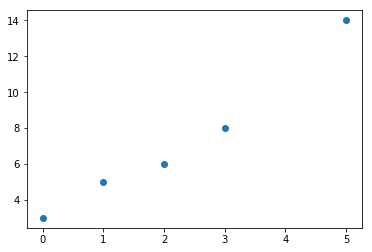

In [5]:
X_1 = data[:, 0:1]
Y = data[:, 1:2]
plt.scatter(X_1, Y)
plt.show()

Now let's create the X matrix, shown above.

In [6]:
X = np.concatenate((np.ones(len(X_1)).reshape(-1, 1), X_1), axis=1)
X

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 5.]])

Now the transpose

In [7]:
XT = np.transpose(X)
XT

array([[1., 1., 1., 1., 1.],
       [0., 1., 2., 3., 5.]])

Now let's calculate our $b_0$ and $b_1$ approximations, using numpy

In [8]:
left = np.linalg.inv(np.matmul(XT, X))
right = np.matmul(XT, Y)
b0, b1 = np.matmul(left, right)

Now we create the regression function

In [9]:
def y_hat(x):
    return b0 + b1*x

... and finally plot the line against the data points!

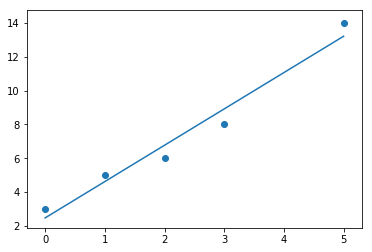

In [10]:
X_1 = data[:, 0:1]
Y = data[:, 1:2]
x = np.linspace(min(X_1), max(X_1), 10000)
plt.plot(x, y_hat(x))
plt.scatter(X_1, Y)
plt.show()

## Trapezium Rule

The first topic we will look at is the Trapeizum rule, which is used for approximating integrals of functions.

Approximate the integral of the function $f(x) = x^5 + 4x^3 - x^2 + 5$ between $x=0$ and $x=5$ using the trapezium rule, described below:

Fix a natural number $N$, which will function as the number of (equal) partitions of the $x$-axis,
Evaluate $f$ at the edge of each of these intervals, obtaining $N+1$ values of $f(x)$
Join up these $f(x_i)$ using a straight line (making $N$ trapezia),

The equation for the total area of these trapezia is then

$
\frac{x_N - x_0}{2N}[f(x_0) + 2(f(x_1) + \cdots + f(x_{N-1})) + f(x_N)]
$

The image below shows the construction of the trapezia [https://www.math24.net/trapezoidal-rule]:

In [11]:
im = Image.open("trapezium_rule.png")
im.show()

Firstly, I define the function, along with $N, x_0$ and $x_N$:

In [12]:
def f(x):
    return x**5 + 4*x**3 - x**2 + 5


N = 1000000
x_0 = 0
x_N = 5

We will calculate an approximation to the integral using the trapzium rule, first using numpy arrays and secondly using lists - to compare the times of both methods.

Now, we calculate the area under the trapezia using the formula 
$
\frac{x_N - x_0}{2N}[f(x_0) + 2(f(x_1) + \cdots + f(x_{N-1})) + f(x_N)]
$,
while also timing how long this takes

In [13]:
start = time.time()
x = np.linspace(x_0, x_N, N+1)  # Create the endpoints of the intervals
y = f(x)  # Evaluate f at each of these points
area_np = (x[-1] - x[0])/(2*N) * (2*sum(y) - y[0] - y[1])
end = time.time()
print(end-start)

1.2806060314178467


We now print out the result

In [14]:
area_np

3212.5090000070927

Note that the actual value of the integral is $3212.5$, so this is very close!

The code below repeats the above step with lists instead of numpy arrays

In [15]:
start = time.time()
# Create the endpoints of the intervals
x_list = [x_0 + i*(x_N-x_0)/N for i in range(N+1)]
# Evaluate f at each of these points
y_list = list(map(f, x_list))
area_list = (x_list[-1] - x_list[0])/(2*N) * \
    (2*sum(y_list) - y_list[0] - y_list[1])
end = time.time()
print(end-start)

2.8501412868499756


Notice how the time taken is much slow than when using numpy arrays. In fact, numpy becomes much faster when matrix-type operations are considered.

Below outputs the calculated area, which, of course, is the same as the previous approximation.

In [16]:
area_list

3212.509000007092